### Setup

- python; 3.7.0
- environment: recommendations

### Courtesy

https://www.kaggle.com/c/whats-cooking-kernels-only

### Installation

In [470]:
# !pip3 install matplotlib
# !pip3 install xgboost

    100% |████████████████████████████████| 645kB 998kB/s ta 0:00:01
  Running setup.py install for xgboost ... done
You are using pip version 9.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


### 1. Datasets

#### 1.1 Initialization

In [458]:
# import packages

import numpy as np
import pandas as pd
import json
import csv
from time import time

import matplotlib.pyplot as plt
from collections import Counter
import sklearn

#### 1.2 Load dataset

In [281]:
train = pd.read_json("train.json")
test = pd.read_json("test.json")

In [282]:
train.head()

,cuisine,id,ingredients
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes..."
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g..."
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,indian,22213,"[water, vegetable oil, wheat, salt]"
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe..."


In [339]:
display(train.describe())

,id
count,39774.000000
mean,24849.536959
std,14360.035505
min,0.000000
25%,12398.250000
50%,24887.000000
75%,37328.500000
max,49717.000000


In [183]:
test.head()

,id,ingredients
0,18009,"[baking powder, eggs, all-purpose flour, raisi..."
1,28583,"[sugar, egg yolks, corn starch, cream of tarta..."
2,41580,"[sausage links, fennel bulb, fronds, olive oil..."
3,29752,"[meat cuts, file powder, smoked sausage, okra,..."
4,35687,"[ground black pepper, salt, sausage casings, l..."


In [340]:
display(test.describe())

,id
count,9944.000000
mean,24894.350362
std,14322.958061
min,5.000000
25%,12541.000000
50%,24731.500000
75%,37113.250000
max,49715.000000


### 2. Data Exploration

#### 2.1 Data fields

##### Training dataset

`id` - unique record id

`cuisine` - dishes are collectively grouped under the regional name

`ingredients` - different dishes that are made of variety of items.

##### Testing dataset

`id` - unique record id

`ingredients` - different dishes that are made of variety of items.

##### Objective
From the training and testing datasets, we have ingredients that constitutes the type of cuisine it belongs to. Ingredients, here are the features and cuisine is the target variable.

#### 2.2 Training dataset: Understanding the cuisine distribution

In [279]:
cuisine_distribution = train['cuisine'].value_counts()

In [188]:
cuisine_distribution

italian         7838
mexican         6438
southern_us     4320
indian          3003
chinese         2673
french          2646
cajun_creole    1546
thai            1539
japanese        1423
greek           1175
spanish          989
korean           830
vietnamese       825
moroccan         821
british          804
filipino         755
irish            667
jamaican         526
russian          489
brazilian        467
Name: cuisine, dtype: int64

#### 2.3 Training set: Plot horizontal graph for cuisine distribution

This helps understanding the distribution of cuisine in the training set itself.

In [285]:
# Convert the array to dict

cuisine_distribution = train['cuisine'].value_counts().to_dict()

In [286]:
cuisine_distribution

{'brazilian': 467,
 'british': 804,
 'cajun_creole': 1546,
 'chinese': 2673,
 'filipino': 755,
 'french': 2646,
 'greek': 1175,
 'indian': 3003,
 'irish': 667,
 'italian': 7838,
 'jamaican': 526,
 'japanese': 1423,
 'korean': 830,
 'mexican': 6438,
 'moroccan': 821,
 'russian': 489,
 'southern_us': 4320,
 'spanish': 989,
 'thai': 1539,
 'vietnamese': 825}

In [314]:
# keys represents the list of unique cuisine
objects = cuisine_distribution.keys()

# set the positions on y-axis
y_pos = np.arange(len(objects))

# read the occurrences of each cuisine in the training set
frequencies = list(cuisine_distribution.values())

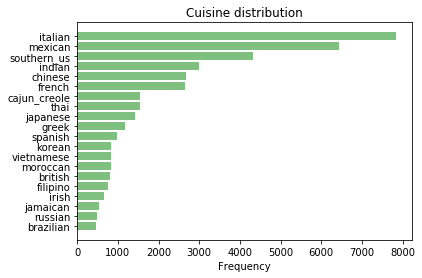

In [196]:
# understand the training set for the distribution of data by cuisine.
# This graph shows the number of cuisine by desc order available in the training set.

fig, ax = plt.subplots()

ax.barh(y_pos, list(frequencies), align='center', alpha=0.5, color = 'green')
ax.set_yticks(y_pos)
ax.set_yticklabels(objects)
ax.invert_yaxis()
ax.set_xlabel('Frequency')
ax.set_title('Cuisine distribution')

plt.show()

#### 2.4 Training set: Plot horizontal graph for ingredients distribution

In this step, we shall understand the distribution of ingredients across the cuisine. The ingredients appearing to the top are used across all the ingredients. Such ingredients appears as outliers as they solely can't be used to identify the cuisine.

Total ingredients collectively used are 6759 in count.

In [287]:
n = 6759

In [288]:
# However, collecting on top 25
top_ingredients = Counter([item for sublist in train.ingredients for item in sublist]).most_common(25)

ingredients_df = pd.DataFrame(top_ingredients, columns=["name", "count"])

In [289]:
top_ingredients

[('salt', 18049),
 ('onions', 7972),
 ('olive oil', 7972),
 ('water', 7457),
 ('garlic', 7380),
 ('sugar', 6434),
 ('garlic cloves', 6237),
 ('butter', 4848),
 ('ground black pepper', 4785),
 ('all-purpose flour', 4632),
 ('pepper', 4438),
 ('vegetable oil', 4385),
 ('eggs', 3388),
 ('soy sauce', 3296),
 ('kosher salt', 3113),
 ('green onions', 3078),
 ('tomatoes', 3058),
 ('large eggs', 2948),
 ('carrots', 2814),
 ('unsalted butter', 2782),
 ('ground cumin', 2747),
 ('extra-virgin olive oil', 2747),
 ('black pepper', 2627),
 ('milk', 2263),
 ('chili powder', 2036)]

In [275]:
# keys represents the list of unique cuisine
ingredients_df_keys = list(ingredients_df['name'])

# set the positions on y-axis
ingredients_y_pos = np.arange(len(ingredients_df_keys))

# read the occurrences of each cuisine in the training set
ingredients_frequencies = list(ingredients_df['count'])

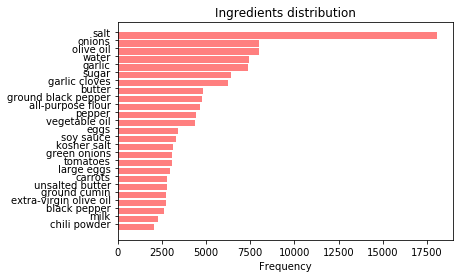

In [276]:
# understand the training set for the distribution of data by cuisine.
# This graph shows the number of cuisine by desc order available in the training set.

fig2, ax2 = plt.subplots()

ax2.barh(ingredients_y_pos, ingredients_frequencies, align='edge', alpha=0.5, color = 'red')
ax2.set_yticks(ingredients_y_pos)
ax2.set_yticklabels(ingredients_df_keys)
ax2.invert_yaxis()
ax2.set_xlabel('Frequency')
ax2.set_title('Ingredients distribution')

plt.show()

#### 2.5 Training set: Plot horizontal graph for ingredients distribution for individual cuisine

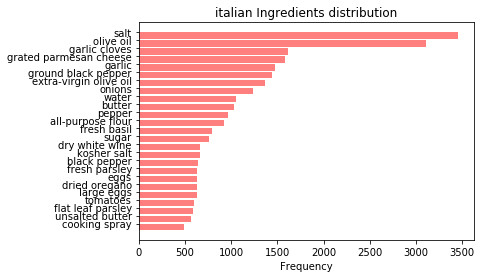

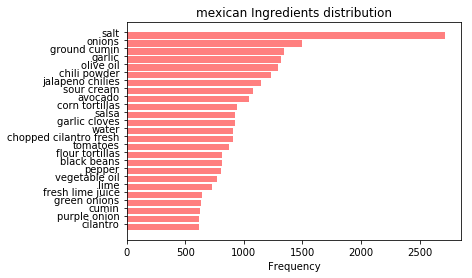

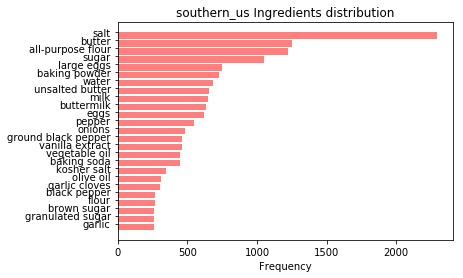

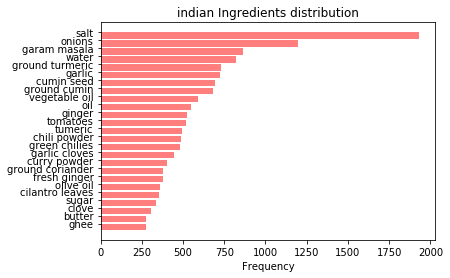

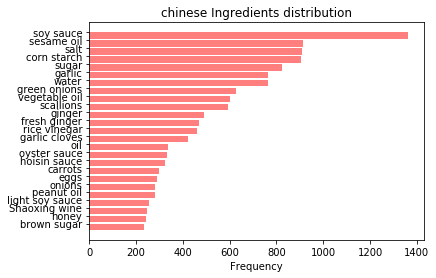

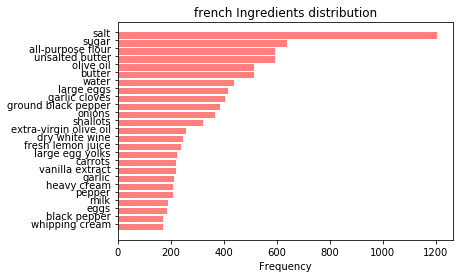

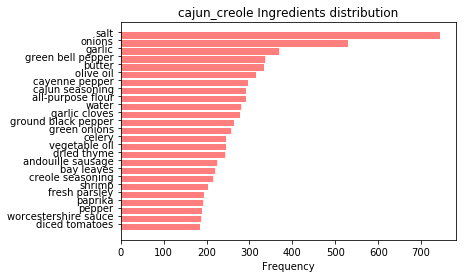

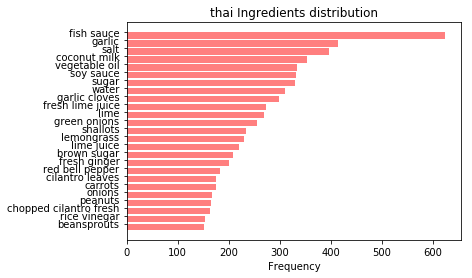

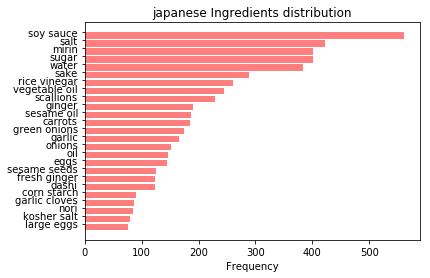

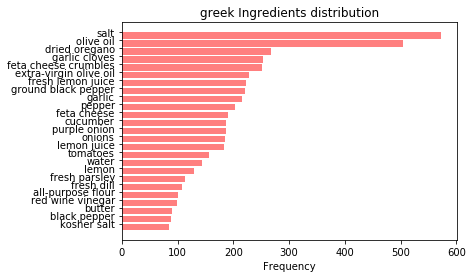

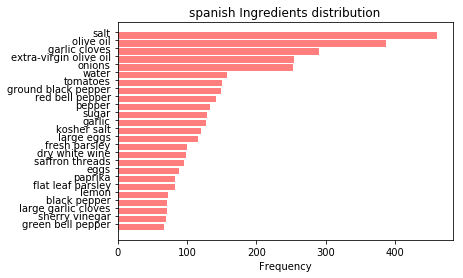

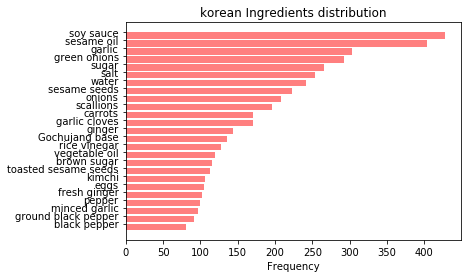

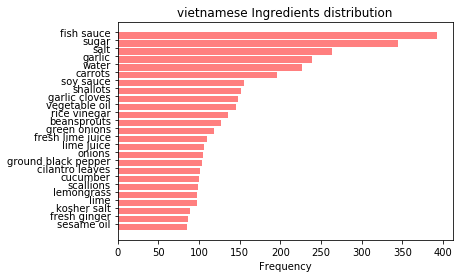

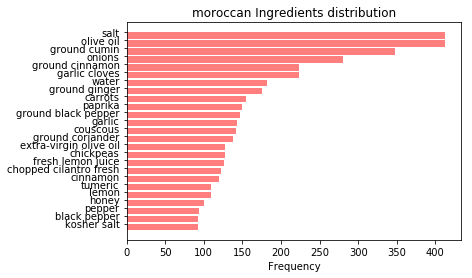

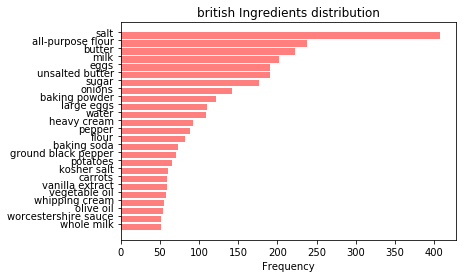

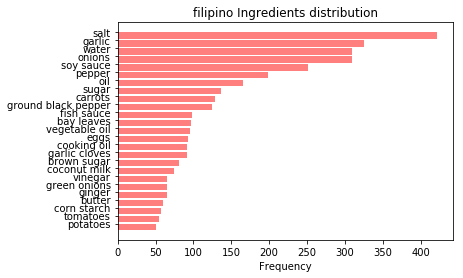

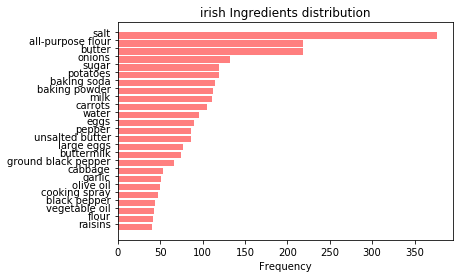

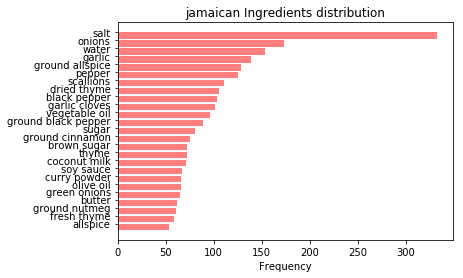

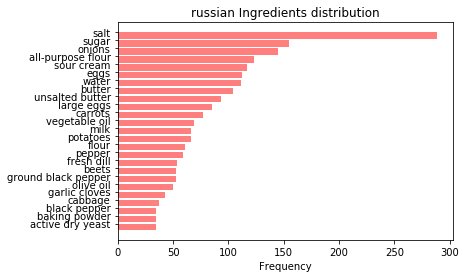

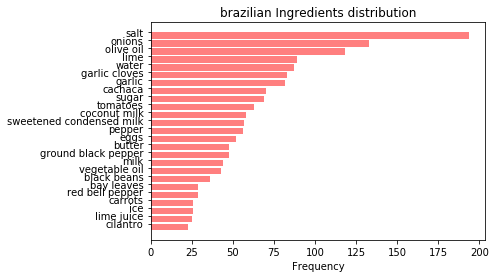

In [333]:
for cuisine in list(objects):
    # Studying italian cuisine for their ingredients
    current_cuisine = train.loc[train["cuisine"] == cuisine]

    # Pick most common ingredients in the italian cuisine
    current_ingredients = Counter([item for sublist in current_cuisine.ingredients for item in sublist]).most_common(25)

    # Form the dataframe to plot graph
    current_dataframe = pd.DataFrame(current_ingredients, columns=["ingredient", "count"])

    # keys represents the list of unique cuisine
    current_df_keys = list(current_dataframe["ingredient"])

    # set the positions on y-axis
    current_y_pos = np.arange(len(current_df_keys))

    # read the occurrences of each cuisine in the training set
    current_frequencies = list(current_dataframe["count"])

    # understand the training set for the distribution of data for italian cuisine.
    # This graph shows the number of cuisine by desc order available in the training set.
    current_fig, current_ax = plt.subplots()

    current_ax.barh(current_y_pos, current_frequencies, align='edge', alpha=0.5, color = 'red')
    current_ax.set_yticks(current_y_pos)
    current_ax.set_yticklabels(current_df_keys)
    current_ax.invert_yaxis()
    current_ax.set_xlabel('Frequency')
    current_ax.set_title(cuisine + ' Ingredients distribution')

    plt.show()

#### 2.6 Testing set: Understand the ingredients distribution

In [336]:
# Study the most common ingredients.
top_ingredients_testing = Counter([item for sublist in test.ingredients for item in sublist]).most_common(25)

# Convert the list into the dataframe
testing_df = pd.DataFrame(top_ingredients_testing, columns = ["ingredient", "count"])

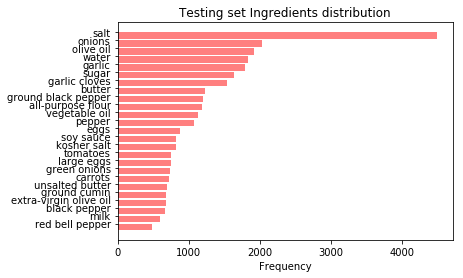

In [338]:
testing_df_keys = list(testing_df["ingredient"])

testing_y_pos = np.arange(len(testing_df_keys))

testing_ingredients_frequencies= list(testing_df["count"])

# understand the training set for the distribution of data for italian cuisine.
# This graph shows the number of cuisine by desc order available in the training set.
testing_fig, testing_ax = plt.subplots()

testing_ax.barh(testing_y_pos, testing_ingredients_frequencies, align='edge', alpha=0.5, color = 'red')
testing_ax.set_yticks(testing_y_pos)
testing_ax.set_yticklabels(testing_df_keys)
testing_ax.invert_yaxis()
testing_ax.set_xlabel('Frequency')
testing_ax.set_title('Testing set Ingredients distribution')

plt.show()

From the graph, it is clearly visible that salt, onionsn olive oil, water are the common ingredients throughout the testing dataset.

However, the objective is to predict each record's cuisine.

### 3. Data Preprocessing

#### 3.1 Training set: Transform cuisine to numerical cuisine

In [343]:
# List down all the cuisine from the training sets
print(list(objects))

['italian', 'mexican', 'southern_us', 'indian', 'chinese', 'french', 'cajun_creole', 'thai', 'japanese', 'greek', 'spanish', 'korean', 'vietnamese', 'moroccan', 'british', 'filipino', 'irish', 'jamaican', 'russian', 'brazilian']


In [344]:
# Allocate the position for each cuisine
train["numerical_cuisine"] = train.cuisine.map({
    "italian": 0,
    "mexican": 1,
    "southern_us": 2,
    'indian': 3,
    'chinese': 4,
    'french': 5,
    'cajun_creole': 6,
    'thai': 7,
    'japanese': 8,
    'greek': 9,
    'spanish': 10,
    'korean': 11,
    'vietnamese': 12,
    'moroccan': 13,
    'british': 14,
    'filipino': 15,
    'irish': 16,
    'jamaican': 17,
    'russian': 18,
    'brazilian': 19
})

In [345]:
train.head()

,cuisine,id,ingredients,numerical_cuisine
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes...",9
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g...",2
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g...",15
3,indian,22213,"[water, vegetable oil, wheat, salt]",3
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe...",3


#### 3.2 Training set: Convert ingredients into text

In [360]:
train["text_ingredients"] = train["ingredients"].apply(lambda collection: " ".join(list(map(lambda text: text.replace(" ", "_"), collection))))

In [361]:
train.head()

,cuisine,id,ingredients,numerical_cuisine,text_ingredients
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes...",9,romaine_lettuce black_olives grape_tomatoes ga...
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g...",2,plain_flour ground_pepper salt tomatoes ground...
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g...",15,eggs pepper salt mayonaise cooking_oil green_c...
3,indian,22213,"[water, vegetable oil, wheat, salt]",3,water vegetable_oil wheat salt
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe...",3,black_pepper shallots cornflour cayenne_pepper...


#### 3.3 Testing set: Convert ingredients into text

In [364]:
test["text_ingredients"] = test["ingredients"].apply(lambda collection: " ".join(list(map(lambda text: text.replace(" ", "_"), collection))))

In [365]:
test.head()

,id,ingredients,text_ingredients
0,18009,"[baking powder, eggs, all-purpose flour, raisi...",baking_powder eggs all-purpose_flour raisins m...
1,28583,"[sugar, egg yolks, corn starch, cream of tarta...",sugar egg_yolks corn_starch cream_of_tartar ba...
2,41580,"[sausage links, fennel bulb, fronds, olive oil...",sausage_links fennel_bulb fronds olive_oil cub...
3,29752,"[meat cuts, file powder, smoked sausage, okra,...",meat_cuts file_powder smoked_sausage okra shri...
4,35687,"[ground black pepper, salt, sausage casings, l...",ground_black_pepper salt sausage_casings leeks...


### 4. Shuffle and Split data

We now split the training data into 80% of training set and 20% of the testing set.

#### 4.1 Initialize the X (features) and Y (labels)

In [426]:
X = train["text_ingredients"]
Y = train["numerical_cuisine"]

In [427]:
# from sklearn.feature_extraction.text import TfidfVectorizer

# tfidf_vectorizer = TfidfVectorizer()
# X = tfidf_vectorizer.fit_transform(train["text_ingredients"])

#### 4.2 Split the training dataset into 80-20%

In [428]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
                                                    X,
                                                    Y,
                                                    test_size=0.2,
                                                    random_state=0
                                                   )

In [429]:
# Show the results of the split.

# Features
print("Training set has " + str(X_train.shape[0]) + " features.")
print("Testing set has " + str(X_test.shape[0]) + " features.")

# Labels
print("Training set has " + str(Y_train.shape[0]) + " features.")
print("Testing set has " + str(Y_test.shape[0]) + " features.")

# Printing labels set
print("Printing labels set...")
print(Y_train.value_counts())
print(Y_test.value_counts())

Training set has 31819 features.
Testing set has 7955 features.
Training set has 31819 features.
Testing set has 7955 features.
Printing labels set...
0     6287
1     5121
2     3468
3     2366
5     2123
4     2112
6     1276
7     1233
8     1148
9      929
10     790
11     685
12     661
13     660
14     638
15     615
16     546
17     404
18     397
19     360
Name: numerical_cuisine, dtype: int64
0     1551
1     1317
2      852
3      637
4      561
5      523
7      306
8      275
6      270
9      246
10     199
14     166
12     164
13     161
11     145
15     140
17     122
16     121
19     107
18      92
Name: numerical_cuisine, dtype: int64


#### 4.3 Split the training dataset into 80-20% with Stratified cross validation

In [430]:
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X, Y, stratify = Y, test_size = 0.2, random_state = 42)

In [431]:
# Show the results of the split

# Features
print("Training set has " + str(X2_train.shape[0]) + " features.")
print("Testing set has " + str(X2_test.shape[0]) + " features.")

# Labels
print("Training set has " + str(Y2_train.shape[0]) + " labels.")
print("testing set has " + str(Y2_test.shape[0]) + " labels.")

# Printing labels set
print(Y2_train.value_counts())
print(Y2_test.value_counts())

Training set has 31819 features.
Testing set has 7955 features.
Training set has 31819 labels.
testing set has 7955 labels.
0     6270
1     5150
2     3456
3     2402
4     2138
5     2117
6     1237
7     1231
8     1139
9      940
10     791
11     664
12     660
13     657
14     643
15     604
16     534
17     421
18     391
19     374
Name: numerical_cuisine, dtype: int64
0     1568
1     1288
2      864
3      601
4      535
5      529
6      309
7      308
8      284
9      235
10     198
11     166
12     165
13     164
14     161
15     151
16     133
17     105
18      98
19      93
Name: numerical_cuisine, dtype: int64


### 5. Word Vectors

Convert the features into the vectors and is numerical

In [432]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(X2_train)

training_vectorizer = vectorizer.transform(X2_train)

In [414]:
# quick view of the vectors generated as an array

training_vectorizer.toarray()

In [433]:
print(len(vectorizer.get_feature_names()))

6419


In [434]:
# run the vectorizer on the testing set

testing_vectorizer = vectorizer.transform(X2_test)

### 6. Evaluate model performance

Considering few supervised learning algorithms:
1. Multinomial Naive Bayes
2. Logistic Regression
3. SVM
4. Stochastic Gradient Descent Classifier (SGDC)
5. XGBoost from the ensemble boost

In [460]:
# Include libraries to evaluate performance

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [461]:
# Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB

kfold = KFold(n_splits = 10, random_state = 7)

model = MultinomialNB()
start = time()
results = cross_val_score(model, training_vectorizer, Y2_train, cv=kfold)
end = time()

print("Mean value: ", results.mean())
print("Training time: ", (end - start))

Mean value:  0.7277411686413535
Training time:  0.21985268592834473


In [462]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression

kfold = KFold(n_splits = 10, random_state = 7)

model = LogisticRegression()
start = time()
results = cross_val_score(model, training_vectorizer, Y2_train, cv=kfold)
end = time()

print("Mean value: ", results.mean())
print("Training time: ", (end - start))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Mean value:  0.7784655059276175
Training time:  74.90525698661804


In [466]:
# SVM

from sklearn.svm import SVC

kfold = KFold(n_splits=10, random_state = 7)

model = SVC()
start = time()
results = cross_val_score(model, training_vectorizer, Y2_train, cv=kfold)
end = time()

print("Mean value: ", results.mean())
print("Training time: ", (end-start))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Mean value:  0.2779468999130799
Training time:  1375.190379858017


In [468]:
# SGDC

from sklearn.linear_model import SGDClassifier

kfold = KFold(n_splits=10, random_state=7)

model = SGDClassifier()
start = time()
results = cross_val_score(model, training_vectorizer, Y2_train, cv=kfold)
end = time()

print("Mean value: ", results.mean())
print("Training time: ", (end-start))

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


Mean value:  0.7639460490882085
Training time:  2.9086649417877197


In [472]:
# XGBoost

from xgboost import XGBClassifier

kfold = KFold(n_splits=10, random_state=7)

model = XGBClassifier()
start = time()
results = cross_val_score(model, training_vectorizer, Y2_train, cv=kfold)
end = time()

print("Mean value: ", results.mean())
print("Training time: ", (end-start))

Mean value:  0.6761052671513036
Training time:  686.1386921405792


Considering the mean accuracy, Logistic Regression yields better outcome.

### 7. Parameter tuning

Using GridSearchCV, we shall find the parameters suitable for the training set.

In [474]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.linear_model import LogisticRegression

In [476]:
model = LogisticRegression()

parameters = { 'C': [1.0, 1.5, 2.0, 2.5], 'random_state': [7, 20, 30, 40, 42] }

scorer = make_scorer(fbeta_score, beta=0.5)

grid_object = GridSearchCV(model, parameters)

grid_fit = grid_object.fit(training_vectorizer, Y2_train)

best_clf = grid_fit.best_estimator_

grid_fit.best_params_

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


{'C': 1.5, 'random_state': 7}

### 8. Model Training

In [477]:
lregression = LogisticRegression(C = 1.5, random_state = 7)

In [478]:
lregression.fit(training_vectorizer, Y2_train)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.5, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=7, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [482]:
lregression.predict_proba(training_vectorizer)

array([[1.71185671e-01, 5.35416720e-01, 1.13177066e-01, ...,
        6.27066364e-03, 5.07713358e-03, 8.97132331e-04],
       [9.18326631e-01, 3.08328299e-04, 1.93354096e-03, ...,
        3.72408073e-04, 2.31636108e-04, 2.21525731e-04],
       [6.27045787e-01, 3.64916642e-03, 5.13387470e-02, ...,
        5.31786984e-03, 3.44334562e-04, 3.38746195e-02],
       ...,
       [9.58641146e-04, 9.16092150e-01, 3.26356052e-02, ...,
        5.62640334e-03, 2.07661583e-03, 1.51912173e-03],
       [4.34097030e-01, 4.39308650e-02, 1.43408920e-01, ...,
        1.25439502e-02, 5.41626508e-03, 1.65733818e-02],
       [4.79699043e-04, 1.61864300e-02, 9.43121399e-01, ...,
        2.20992321e-04, 5.45833042e-04, 4.90368355e-03]])

In [492]:
X_train_prediction = lregression.predict(training_vectorizer)

In [493]:
X_test_prediction = lregression.predict(testing_vectorizer)

#### 8.1 Accuracy Score

In [495]:
from sklearn import metrics

metrics.accuracy_score(Y2_test, X_test_prediction)

0.7827781269641735

In [496]:
metrics.accuracy_score(Y2_train, X_train_prediction)

0.8875828907256671

In [497]:
y_pred_prob = lregression.predict_proba(testing_vectorizer)

y_pred_prob[:10]

array([[4.05701615e-06, 2.72004866e-05, 3.13886816e-04, 1.94155746e-03,
        1.67818254e-05, 6.74420046e-05, 2.61714834e-02, 3.38880509e-05,
        9.47999701e-05, 2.43326167e-07, 8.12653247e-05, 4.07902668e-05,
        3.48705627e-04, 1.72643119e-04, 3.69057850e-06, 1.75663275e-05,
        1.91449511e-04, 9.68872211e-01, 1.75470433e-04, 1.42486730e-03],
       [5.76707030e-01, 1.58757715e-01, 1.15476025e-03, 6.48181828e-03,
        3.27514924e-03, 1.24087974e-01, 2.08623048e-02, 8.39512500e-03,
        9.37944072e-04, 1.08982646e-05, 1.39586855e-02, 4.10303365e-03,
        6.96636802e-02, 1.83043989e-03, 4.18710696e-05, 3.42352348e-04,
        3.84259617e-05, 6.66088717e-04, 6.03180879e-05, 8.62438601e-03],
       [4.04018201e-01, 4.08800123e-03, 7.29539656e-03, 3.95702571e-03,
        1.29184734e-03, 2.28348888e-02, 1.87623737e-03, 2.42729852e-04,
        7.27877130e-03, 2.45930064e-03, 6.20063825e-04, 7.66938279e-04,
        8.78459403e-05, 2.12062122e-04, 4.88338044e-01, 1.8026

#### 8.2 Classification report

In [498]:
from sklearn.metrics import classification_report

In [500]:
print(classification_report(Y2_train, X_train_prediction, target_names=list(objects)))

              precision    recall  f1-score   support

     italian       0.87      0.95      0.91      6270
     mexican       0.94      0.96      0.95      5150
 southern_us       0.83      0.90      0.86      3456
      indian       0.91      0.95      0.93      2402
     chinese       0.89      0.93      0.91      2138
      french       0.78      0.78      0.78      2117
cajun_creole       0.90      0.84      0.86      1237
        thai       0.92      0.90      0.91      1231
    japanese       0.93      0.82      0.87      1139
       greek       0.92      0.83      0.87       940
     spanish       0.87      0.65      0.75       791
      korean       0.96      0.88      0.92       664
  vietnamese       0.92      0.79      0.85       660
    moroccan       0.94      0.90      0.92       657
     british       0.87      0.70      0.78       643
    filipino       0.92      0.82      0.87       604
       irish       0.90      0.71      0.79       534
    jamaican       0.96    

### 9. Predict testing dataset

In [501]:
unpredicted_ingredients = test["text_ingredients"]

unpredicted_ingredients_vectorizer = vectorizer.transform(unpredicted_ingredients)

In [502]:
unpredicted_ingredients_vectorizer

<9944x6419 sparse matrix of type '<class 'numpy.int64'>'
	with 110016 stored elements in Compressed Sparse Row format>

In [503]:
unpredicted_ingredients_prediction = lregression.predict(unpredicted_ingredients_vectorizer)

In [505]:
predicted_prob = lregression.predict_proba(unpredicted_ingredients_vectorizer)

predicted_prob[:10]

array([[1.48377700e-01, 5.55935354e-02, 7.09071246e-02, 2.47906063e-02,
        1.82155655e-02, 1.88006071e-02, 2.85026381e-03, 4.04123510e-03,
        7.82836371e-02, 2.82874308e-02, 1.27256423e-02, 6.12792948e-03,
        1.07609506e-03, 6.62716584e-04, 3.08612597e-01, 1.95462478e-02,
        1.61356055e-01, 3.08975348e-03, 3.13961688e-02, 5.25908735e-03],
       [7.05989403e-04, 3.05659218e-03, 7.53826271e-01, 1.75573685e-04,
        1.48850126e-03, 5.63377696e-02, 2.15260617e-03, 1.13294872e-04,
        8.45253384e-02, 7.97824099e-04, 4.94532207e-03, 7.07592163e-05,
        5.76029157e-03, 3.68096277e-05, 2.81045349e-02, 4.89575181e-02,
        1.00912372e-03, 3.90145465e-03, 3.15349987e-04, 3.71907505e-03],
       [7.68797559e-01, 4.43926826e-02, 9.43854193e-03, 3.13946351e-02,
        1.93394605e-02, 1.16576399e-02, 5.90667610e-03, 6.52000702e-04,
        8.59025830e-03, 1.40839454e-02, 2.08990353e-02, 1.54268562e-03,
        5.11819929e-03, 2.40351712e-02, 1.41371248e-02, 4.8791

In [506]:
unpredicted_ingredients_prediction

array([14,  2,  0, ...,  0,  2,  1])

In [508]:
len(test)

9944

In [512]:
numerical_ingredients = pd.DataFrame(unpredicted_ingredients_prediction, columns=["numerical_ingredients"])

predicted_testing_ingredients = pd.concat([test, numerical_ingredients], axis=1)

         id                                        ingredients  \
0     18009  [baking powder, eggs, all-purpose flour, raisi...   
1     28583  [sugar, egg yolks, corn starch, cream of tarta...   
2     41580  [sausage links, fennel bulb, fronds, olive oil...   
3     29752  [meat cuts, file powder, smoked sausage, okra,...   
4     35687  [ground black pepper, salt, sausage casings, l...   
5     38527  [baking powder, all-purpose flour, peach slice...   
6     19666             [grape juice, orange, white zinfandel]   
7     41217  [ground ginger, white pepper, green onions, or...   
8     28753  [diced onions, taco seasoning mix, all-purpose...   
9     22659  [eggs, cherries, dates, dark muscovado sugar, ...   
10    21749  [pasta, olive oil, crushed red pepper, cherry ...   
11    44967  [water, butter, ground sumac, ground lamb, gro...   
12    42969  [curry powder, ground cumin, chicken wings, ch...   
13    44883  [pasta, marinara sauce, dried basil, chicken f...   
14    2082

In [515]:
# reflect cuisine for each records in the testing set
predicted_testing_ingredients["cuisine"] = predicted_testing_ingredients.numerical_ingredients.map({
    0: "italian",
    1: "mexican",
    2: "southern_us",
    3: "indian",
    4: "chinese",
    5: "french",
    6: "cajun_creole",
    7: "thai",
    8: "japanese",
    9: "greek",
    10: "spanish",
    11: "korean",
    12: "vietnamese",
    13: "moroccan",
    14: "british",
    15: "filipino",
    16: "irish",
    17: "jamaican",
    18: "russian",
    19: "brazilian",
})

In [516]:
predicted_testing_ingredients.head()

,id,ingredients,text_ingredients,numerical_ingredients,cuisine
0,18009,"[baking powder, eggs, all-purpose flour, raisi...",baking_powder eggs all-purpose_flour raisins m...,14,british
1,28583,"[sugar, egg yolks, corn starch, cream of tarta...",sugar egg_yolks corn_starch cream_of_tartar ba...,2,southern_us
2,41580,"[sausage links, fennel bulb, fronds, olive oil...",sausage_links fennel_bulb fronds olive_oil cub...,0,italian
3,29752,"[meat cuts, file powder, smoked sausage, okra,...",meat_cuts file_powder smoked_sausage okra shri...,6,cajun_creole
4,35687,"[ground black pepper, salt, sausage casings, l...",ground_black_pepper salt sausage_casings leeks...,0,italian


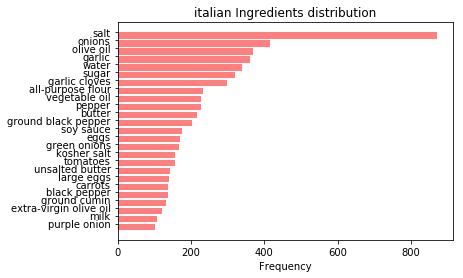

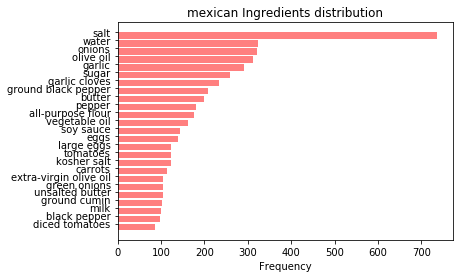

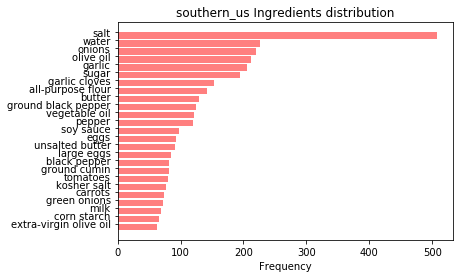

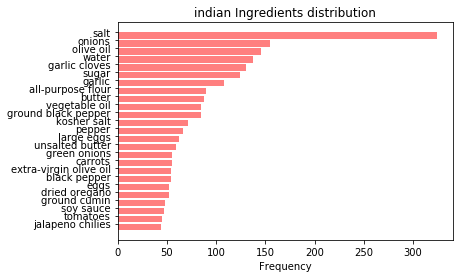

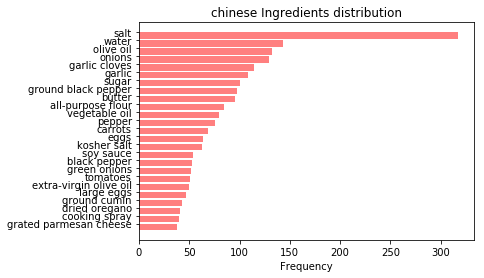

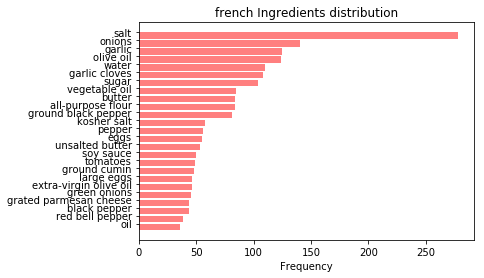

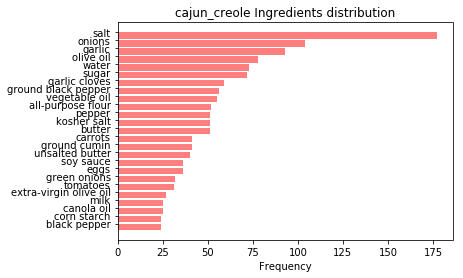

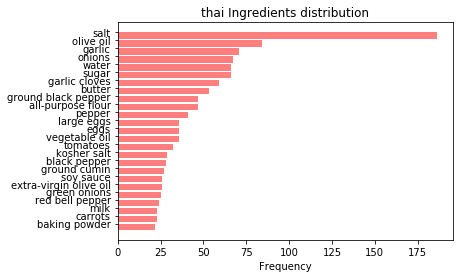

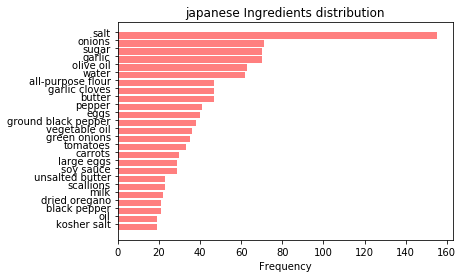

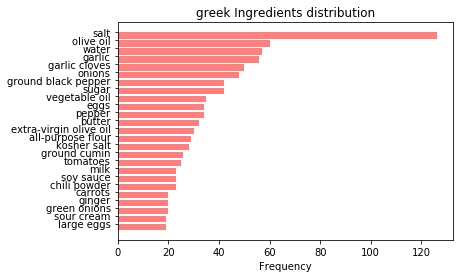

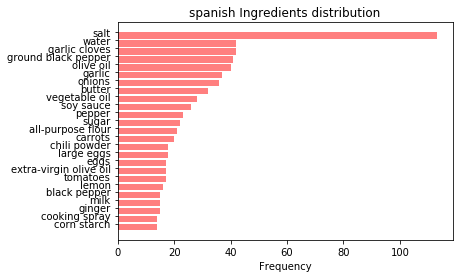

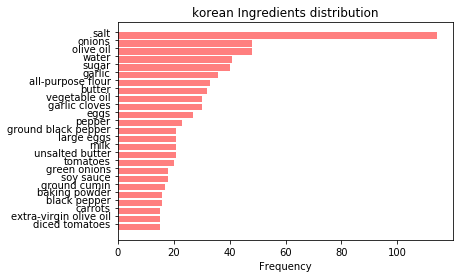

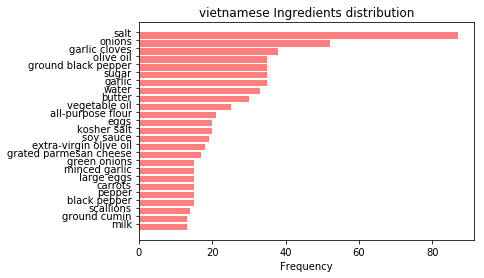

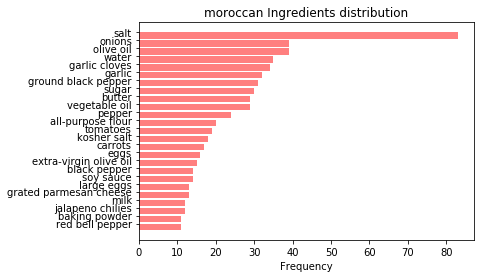

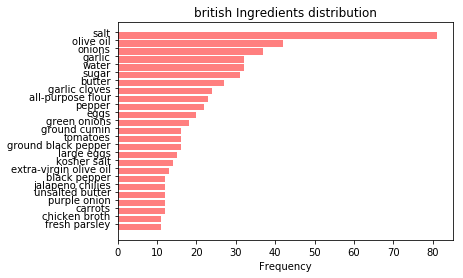

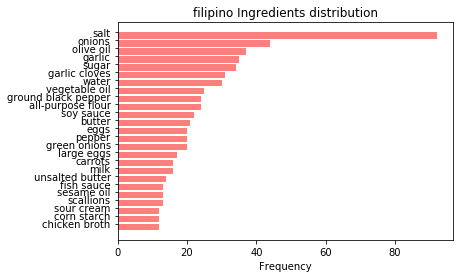

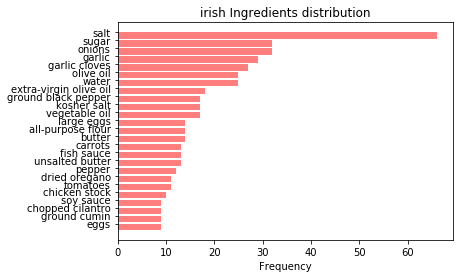

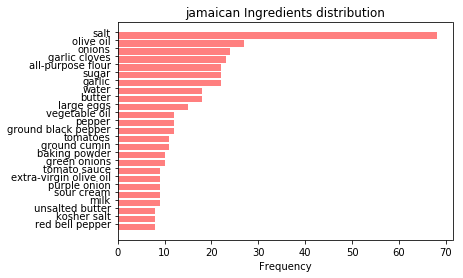

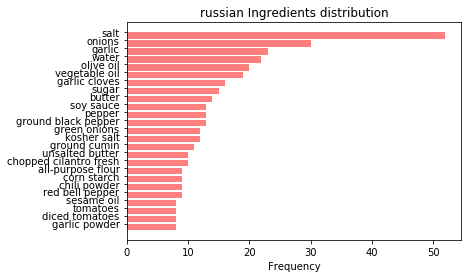

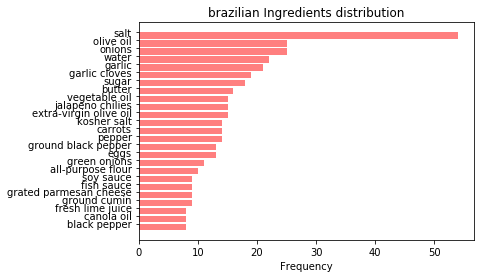

In [517]:
for cuisine in list(objects):
    # Studying italian cuisine for their ingredients
    current_cuisine = predicted_testing_ingredients.loc[train["cuisine"] == cuisine]

    # Pick most common ingredients in the italian cuisine
    current_ingredients = Counter([item for sublist in current_cuisine.ingredients for item in sublist]).most_common(25)

    # Form the dataframe to plot graph
    current_dataframe = pd.DataFrame(current_ingredients, columns=["ingredient", "count"])

    # keys represents the list of unique cuisine
    current_df_keys = list(current_dataframe["ingredient"])

    # set the positions on y-axis
    current_y_pos = np.arange(len(current_df_keys))

    # read the occurrences of each cuisine in the training set
    current_frequencies = list(current_dataframe["count"])

    # understand the training set for the distribution of data for italian cuisine.
    # This graph shows the number of cuisine by desc order available in the training set.
    current_fig, current_ax = plt.subplots()

    current_ax.barh(current_y_pos, current_frequencies, align='edge', alpha=0.5, color = 'red')
    current_ax.set_yticks(current_y_pos)
    current_ax.set_yticklabels(current_df_keys)
    current_ax.invert_yaxis()
    current_ax.set_xlabel('Frequency')
    current_ax.set_title(cuisine + ' Ingredients distribution')

    plt.show()